# Центральная предельная теорема своими руками

Ваша задача — оценить распределение выборочного среднего вашей случайной величины при разных объёмах выборок. Для этого при трёх и более значениях n (например, 5, 10, 50) сгенерируйте 1000 выборок объёма n и постройте гистограммы распределений их выборочных средних. Используя информацию о среднем и дисперсии исходного распределения (её можно без труда найти в википедии), посчитайте значения параметров нормальных распределений, которыми, согласно центральной предельной теореме, приближается распределение выборочных средних. Обратите внимание: для подсчёта значений этих параметров нужно использовать именно теоретические среднее и дисперсию вашей случайной величины, а не их выборочные оценки. Поверх каждой гистограммы нарисуйте плотность соответствующего нормального распределения (будьте внимательны с параметрами функции, она принимает на вход не дисперсию, а стандартное отклонение).

In [93]:
import scipy.stats as stats
from scipy.stats import norm
from scipy.stats import chi
import scipy.stats as sts
import numpy as np
import math
from scipy.special import gamma, factorial
import matplotlib.pyplot as pl
%matplotlib inline

В качестве распределения было выбрано хи-распределение, ниже прилагается ссылка на описание распределения с Вики:
https://en.wikipedia.org/wiki/Chi_distribution


Приведем формулы для вычисления основных вероятностных характеристик хи-распределения с параметром формы $k$:

$$\mu = \sqrt(2) \cdot \frac{\Gamma((k+1)/2)}{\Gamma(k/2)}$$

$$\sigma^2 = k - \mu^2$$

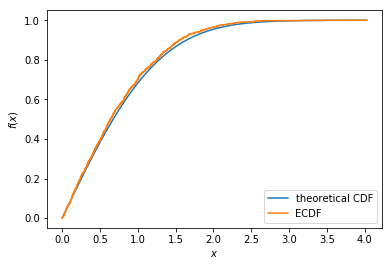

In [94]:
df = 1 # df is a shape parameter

my_distr = chi(df)
sample = my_distr.rvs(1000)

x = np.linspace(min(sample),max(sample),1000)
cdf = my_distr.cdf(x)
pl.plot(x, cdf, label='theoretical CDF')

# для построения ECDF используем библиотеку statsmodels
from statsmodels.distributions.empirical_distribution import ECDF
ecdf = ECDF(sample)
pl.step(ecdf.x, ecdf.y, label='ECDF')

pl.ylabel('$f(x)$')
pl.xlabel('$x$')
pl.legend(loc='lower right')

C:\Users\User\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


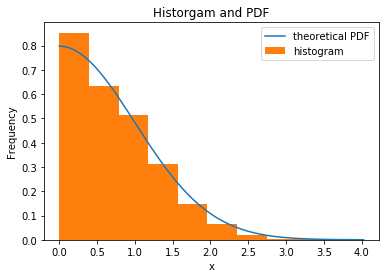

In [95]:
pdf = my_distr.pdf(x)
pl.plot(x, pdf, label='theoretical PDF')
r = my_distr.rvs(1000)
h = sorted(r)

pl.hist(h, normed = True, label='histogram')
pl.legend()
pl.ylabel('Frequency')
pl.xlabel('x')
pl.title('Historgam and PDF')
pl.show()


In [97]:
means = {'5': 0, '10': 0, '50': 0, '100': 0, '1000': 0}
sample_size = [5, 10, 50, 100, 1000]
for n in sample_size:
    temp = []
    for i in range(1000):
        sample = my_distr.rvs(n)
        temp.append(sum(sample)/n)
    means[str(n)] = np.array(temp)
    print(str(n))
    
len(means['50'])

5
10
50
100
1000


1000

In [98]:
mean, var = my_distr.stats(moments='mv')
print(mean, var)

0.7978845608028655 0.3633802276324184


C:\Users\User\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


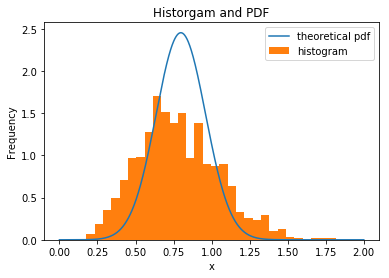

In [127]:
n = 5

mean_chi = math.sqrt(2)*gamma((df+1)/2)/gamma(df/2)
std_chi = df - mean_chi**2

norm_distr = sts.norm(mean_chi, std_chi/math.sqrt(n))
x = np.linspace(0,2,1000)
fit = norm_distr.pdf(x)

pl.plot(x, fit, '-', label='theoretical pdf')
pl.hist(means[str(n)], bins = 30, normed = True, label='histogram')
pl.legend()
pl.ylabel('Frequency')
pl.xlabel('x')
pl.title('Historgam and PDF')
pl.show()

C:\Users\User\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


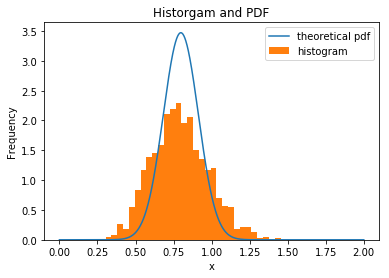

In [128]:
n = 10

mean_chi = math.sqrt(2)*gamma((df+1)/2)/gamma(df/2)
std_chi = df - mean_chi**2

norm_distr = sts.norm(mean_chi, std_chi/math.sqrt(n))
x = np.linspace(0,2,1000)
fit = norm_distr.pdf(x)

pl.plot(x, fit, '-', label='theoretical pdf')
pl.hist(means[str(n)], bins = 30, normed = True, label='histogram')
pl.legend()
pl.ylabel('Frequency')
pl.xlabel('x')
pl.title('Historgam and PDF')
pl.show()

C:\Users\User\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


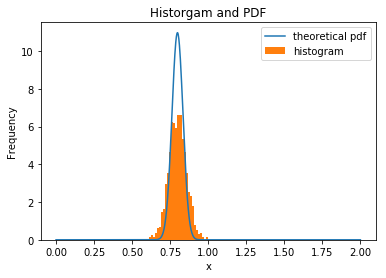

In [129]:
n = 100

mean_chi = math.sqrt(2)*gamma((df+1)/2)/gamma(df/2)
std_chi = df - mean_chi**2

norm_distr = sts.norm(mean_chi, std_chi/math.sqrt(n))
x = np.linspace(0,2,1000)
fit = norm_distr.pdf(x)

pl.plot(x, fit, '-', label='theoretical pdf')
pl.hist(means[str(n)], bins = 30, normed = True, label='histogram')
pl.legend()
pl.ylabel('Frequency')
pl.xlabel('x')
pl.title('Historgam and PDF')
pl.show()

C:\Users\User\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


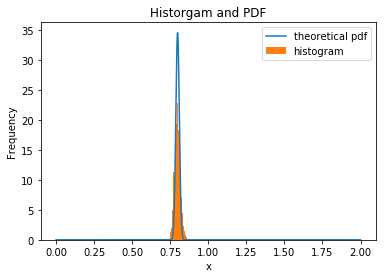

In [130]:
n = 1000

mean_chi = math.sqrt(2)*gamma((df+1)/2)/gamma(df/2)
std_chi = df - mean_chi**2

norm_distr = sts.norm(mean_chi, std_chi/math.sqrt(n))
x = np.linspace(0,2,1000)
fit = norm_distr.pdf(x)

pl.plot(x, fit, '-', label='theoretical pdf')
pl.hist(means[str(n)], bins = 30, normed = True, label='histogram')
pl.legend()
pl.ylabel('Frequency')
pl.xlabel('x')
pl.title('Historgam and PDF')
pl.show()

# Вывод

Утверждение центральной предельной теоремы было проверено на практике. Как видно из графиков с ростом числа $n$, гистограмма выборочных средних приближалась к плотности нормального закона с заданными параметрами.